<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-VS-PyTorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = np.random.uniform(-10, 10, n)
    noise = np.random.normal(0, 0.15, n)
    y = (m * x + b ) + noise
    return x.astype(np.float32), y.astype(np.float32)

    # x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    # noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    # y = (m * x + b ) + noise
    # return x.numpy(), y.numpy()

## Data Visualization

Text(0, 0.5, 'y')

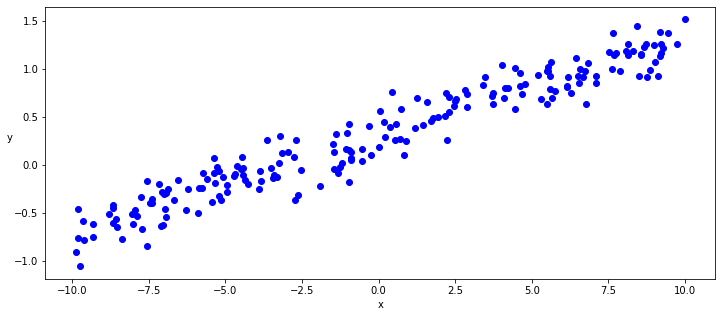

In [6]:
x, y = generate_data()

plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
plt.xlabel("x")
plt.ylabel("y",rotation = 0)

# TensorFlow Dynamic Model

In [7]:
class LinearRegressionKeras(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.w = tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))
        self.b = tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))

    def __call__(self,x): 
        return x * self.w + self.b

# class LinearRegressionKeras(tf.keras.Model):
#     def __init__(self):
#         super().__init__()
#         self.params = {
#             "w" : tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1)),
#             "b" : tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))
#         }        

#     def __call__(self,x): 
#         y_pred = x * self.params["w"] + self.params["b"]
#         return y_pred

# PyTorch Dynamic Model

In [8]:
class LinearRegressionPyTorch(torch.nn.Module): 
    def __init__(self): 
        super().__init__() 
        self.w = torch.nn.Parameter(torch.Tensor(1, 1))
        self.b = torch.nn.Parameter(torch.Tensor(1))
        self.w.data.uniform_(-0.1, 0.1)
        self.b.data.uniform_(-0.1, 0.1)
  
    def forward(self, x):  
        return x @ self.w + self.b
    
    
# class LinearRegressionPyTorch(torch.nn.Module):
#     def __init__(self):
#         super(LinearRegressionPyTorch, self).__init__()
#         self.linear = torch.nn.Linear(1, 1)  

#     def forward(self, x):
#         out = self.linear(x)
#         return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

In [10]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))
    # diff = y_pred - y_true
    # return tf.math.reduce_sum(diff * diff) / tf.size(diff, out_type=tf.dtypes.float32)

tf_model = LinearRegressionKeras()
[w, b] = tf_model.trainable_variables

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
        
    w_grad, b_grad = tape.gradient(loss, tf_model.trainable_variables)

    w.assign(w - w_grad * learning_rate)
    b.assign(b - b_grad * learning_rate)

    if epoch % 20 == 0:
        print(f"Epoch {epoch} : Loss {loss.numpy()}")

Epoch 0 : Loss 0.279054194688797
Epoch 20 : Loss 0.12457714229822159
Epoch 40 : Loss 0.10902520269155502
Epoch 60 : Loss 0.10212395340204239
Epoch 80 : Loss 0.0961911603808403
Epoch 100 : Loss 0.09074058383703232
Epoch 120 : Loss 0.08571096509695053
Epoch 140 : Loss 0.0810684934258461
Epoch 160 : Loss 0.07678332179784775
Epoch 180 : Loss 0.07282790541648865
Epoch 200 : Loss 0.06917688995599747
Epoch 220 : Loss 0.06580684334039688
Epoch 240 : Loss 0.06269614398479462
Epoch 260 : Loss 0.059824828058481216
Epoch 280 : Loss 0.05717449262738228
Epoch 300 : Loss 0.054728105664253235
Epoch 320 : Loss 0.05246999114751816
Epoch 340 : Loss 0.050385650247335434
Epoch 360 : Loss 0.048461705446243286
Epoch 380 : Loss 0.04668581113219261
Epoch 400 : Loss 0.0450466051697731
Epoch 420 : Loss 0.04353352636098862
Epoch 440 : Loss 0.04213689640164375
Epoch 460 : Loss 0.04084775969386101
Epoch 480 : Loss 0.0396578274667263


# PyTorch Training

In [11]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))


In [12]:
def squared_error(y_pred, y_true):
    return torch.mean(torch.square(y_pred - y_true))
    # diff = y_pred - y_true
    # return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()
[w, b] = torch_model.parameters()

# criterion = torch.nn.MSELoss(reduction='mean')
# optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    y_pred = torch_model(inputs)
    loss = squared_error(y_pred, labels)

    # optimizer.zero_grad()
    loss.backward()
    # optimizer.step()

    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 20 == 0:
      print(f"Epoch {epoch} : Loss {loss.data}")


Epoch 0 : Loss 1.4271912574768066
Epoch 20 : Loss 0.22078648209571838
Epoch 40 : Loss 0.14129355549812317
Epoch 60 : Loss 0.12859176099300385
Epoch 80 : Loss 0.1204274371266365
Epoch 100 : Loss 0.1131003126502037
Epoch 120 : Loss 0.10634930431842804
Epoch 140 : Loss 0.10011854767799377
Epoch 160 : Loss 0.09436734020709991
Epoch 180 : Loss 0.08905872702598572
Epoch 200 : Loss 0.08415861427783966
Epoch 220 : Loss 0.07963564246892929
Epoch 240 : Loss 0.07546070218086243
Epoch 260 : Loss 0.0716070681810379
Epoch 280 : Loss 0.06805001199245453
Epoch 300 : Loss 0.06476667523384094
Epoch 320 : Loss 0.06173602119088173
Epoch 340 : Loss 0.058938588947057724
Epoch 360 : Loss 0.05635643005371094
Epoch 380 : Loss 0.0539730042219162
Epoch 400 : Loss 0.05177299678325653
Epoch 420 : Loss 0.04974229633808136
Epoch 440 : Loss 0.04786785691976547
Epoch 460 : Loss 0.04613768681883812
Epoch 480 : Loss 0.0445406399667263


# Data Visualization

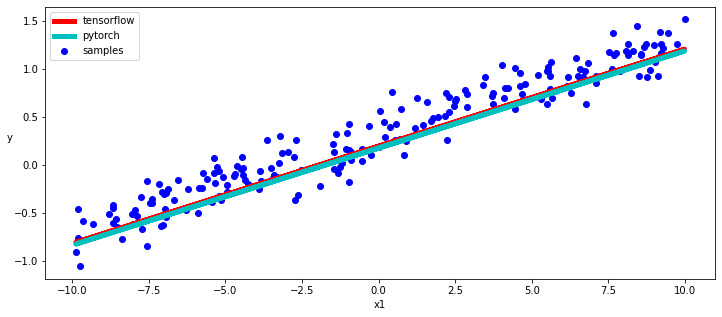

In [13]:
[w_tf, b_tf] = tf_model.trainable_variables
[w_torch, b_torch] = torch_model.parameters()

with torch.no_grad():
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x, y, c = "b", label="samples")
  ax.plot(x, w_tf * x + b_tf, "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w_torch * inputs + b_torch, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)